In [1]:
import numpy as np
from wgpu.gui.auto import WgpuCanvas
import pygfx as gfx
from fastplotlib import GridPlot, Line, Scatter
from time import sleep

RFBOutputContext()

MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0

Disabling presentation on 'Intel(R) Graphics (RKL GT1)' (id 0x3964580) because of NV Optimus (on Linux)



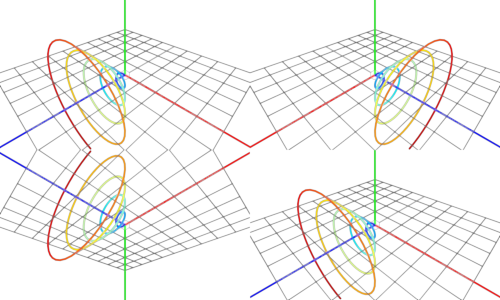

JupyterWgpuCanvas()

In [2]:
phi = np.linspace(0, 30, 200)

xs = phi * np.cos(phi)
ys = phi * np.sin(phi)
zs = phi

canvas = WgpuCanvas()
renderer = gfx.renderers.WgpuRenderer(canvas)

grid_plot = GridPlot(
    canvas=canvas,
    renderer=renderer,
    grid_shape=(2, 2),
    cameras=np.array([['p', 'p'], ['p', 'p']]),
    controllers=np.array([[0, 1], [1, 1]])
)

spiral = np.dstack([xs, ys, zs])[0]

markers = list()
for i, subplot in enumerate(grid_plot):
    line = Line(data=spiral, size=2, cmap='jet')
    subplot.add_graphic(line)
    subplot.set_axes_visibility(True)
    subplot.set_grid_visibility(True)
    if i == 1:
        subplot.camera.scale.x = -1
    if i == 2:
        subplot.camera.scale.y = -1
    
    marker = Scatter(data=spiral[0], size=10)
    subplot.add_graphic(marker)
    markers.append(marker)
    
marker_index = 0

def move_marker():
    # sleep(1)
    global marker_index
    global markers
    
    marker_index += 1
    
    if marker_index == spiral.shape[0]:
        marker_index = 0
    
    new_markers = list()
    for subplot, marker in zip(grid_plot, markers):
        subplot.remove_graphic(marker)
        new_marker = Scatter(data=spiral[marker_index])
        new_markers.append(new_marker)
        subplot.add_graphic(new_marker)
        
    markers = new_markers

grid_plot.add_animations([move_marker])
    
canvas.request_draw(grid_plot.animate)
canvas